## 도미빙어 분류

### 데이터 준비
- 도미 길이, 무게 데이터
    - http://bit.ly/bream_list
- 방어 길이, 무게 데이터
    - http://bit.ly/smelt_list

In [ ]:
# 도미 35마리
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 35마리
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### 산점도
- 데이터가 어떻게 분포되었는지 시각화한 도표
- x, y축으로 이루어지고, (x,y) 관계표시

In [5]:
import matplotlib.pyplot as plt

In [14]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' 
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

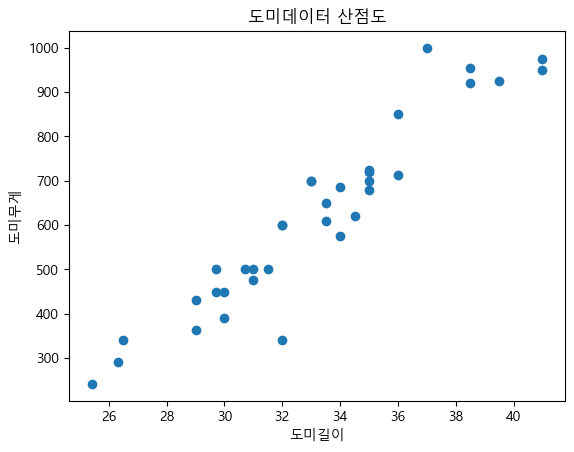

In [16]:
# 산점도 도표 함수 scatter()
plt.scatter(bream_length,bream_weight)
plt.xlabel("도미길이")
plt.ylabel("도미무게")
plt.title("도미데이터 산점도")
plt.show()

### 데이터 확인
- 두 가지 `특성` - 길이, 무게
- 길이가 길수록 무게가 많이 나간다
- 일직선에 가깝다(`선형적` Linear)

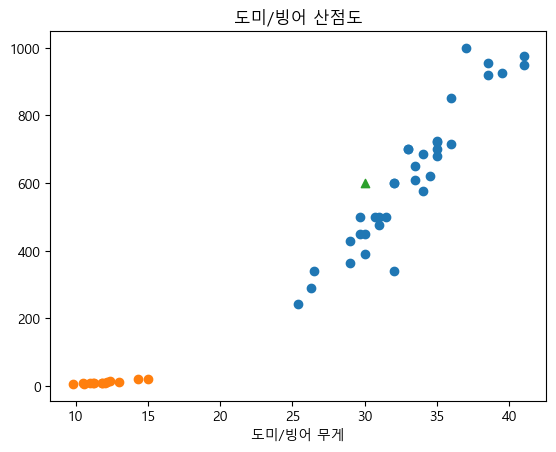

In [46]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter([30],[600],marker='^')
plt.xlabel('도미/빙어 길이')
plt.xlabel('도미/빙어 무게')
plt.title('도미/빙어 산점도')
plt.show()


### K-최근접 이웃 알고리즘
- k-Nearest Neighbors algorithm
- 도미/빙어 데이터를 합치기

In [18]:
length = bream_length + smelt_length
weight = bream_weight + smelt_length

In [22]:
len(length) 
len(weight) 

49

In [ ]:
fish_data = [[l,w] for l, w in zip(length,weight)]
fish_data

#### 각 데이터에 대한 분류데이터 생성

In [28]:
# 타겟 데이터

fish_target = [1] * 35 + [0] * 14
print(fish_target)
print(len(fish_target))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49


- 도미 1, 빙어 0으로 분류

#### K-최근접 이웃 알고리즘 사용
- 사이킷런 모듈

In [29]:
from sklearn.neighbors import KNeighborsClassifier as skc

- kn은 `모델` 객체

In [ ]:
kn = skc()

- fit() 함수로 `훈련 (training)` 시작

In [33]:
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

- 훈련 점수 도출

In [34]:
kn.score(fish_data,fish_target)

1.0

#### K-최근접 이웃 알고리즘
- 주어진 데이터 내에서 새로운 데이터의 근처에 있는 데이터가 무엇인지 확인해서 값을 도출

- predict()로 `예측` 수행

In [47]:
# 길이 30cm , 무게 600g 물고기가 무엇인지 예측
kn.predict([[30,600]])

array([1])

- 위 데이터는 도미라고 예측

분류시 참조하는 이웃데이터 개수

In [64]:
kn.n_neighbors = 49

print(kn.score(fish_data,fish_target))  # 35/49
kn.predict([[10,5]])

0.7142857142857143


array([1])